In [126]:
%config IPCompleter.greedy=True

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.io

X (50, 2)


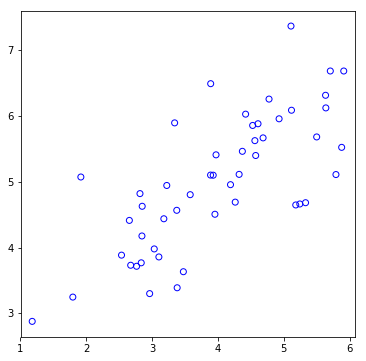

In [127]:
data = scipy.io.loadmat('ex7data1.mat')
X = data['X']
print('X', X.shape)
#  Visualize the example dataset
plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], marker='o', color='b', facecolors='none', lw=1.0)
plt.axis([0.5, 6.5, 2, 8])
plt.axis('equal')
plt.show()

In [132]:
def featureNormalize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X -= mean
    X /= std
    return X, mean, std

X_norm, mean, std = featureNormalize(X)
print('X', X.shape, 'mean', mean, 'std', std)    

X (50, 2) mean [-1.17683641e-16  1.12354570e-15] std [1. 1.]


In [133]:
# You need to return the following variables correctly.

# ====================== YOUR CODE HERE ======================
# Instructions: You should first compute the covariance matrix. Then, you
#               should use the "svd" function to compute the eigenvectors
#               and eigenvalues of the covariance matrix.
#
# Note: When computing the covariance matrix, remember to divide by m (the
#       number of examples).
#

def pca(X):
    m = X.shape[0]
    covariance_matrix = (1/m)*X.T.dot(X)
    U, S, V = np.linalg.svd(covariance_matrix)
    #print(covariance_matrix)
    return U, S, V

U, S, V = pca(X_norm)

print('U', U.shape, 'S', S.shape, 'V', V.shape)
print('U', U)

def convertToEye(S):
    S_prime = np.eye(len(S))
    for i, s in enumerate(S):
        S_prime[i][i] = s
    return S_prime
 
S_prime = convertToEye(S)
#print(U.dot(S_prime).dot(V))

def projectData(X, U, k):
 
    U_reduce = U[:,:k]
    z = X.dot(U_reduce)
    print("X", X.shape, 'U_reduce', U_reduce.shape, 'k', k)
    return z

def recoverData(z, U, k):
    
    U_reduce = U[:,:k]
    z_rec = z.dot(U_reduce.T)
    print("z", z.shape, 'U_reduce', U_reduce.shape, 'k', k)
    return z_rec

z = projectData(X, U, 1)
print("X[0]", X[0])
z_rec = recoverData(z, U, 1)
print("z_rec", z_rec[0])
print("z_rec'", (z_rec[0] * std) + mean)



U (2, 2) S (2,) V (2, 2)
U [[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]
X (50, 2) U_reduce (2, 1) k 1
X[0] [-0.52331306 -1.59279252]
z (50, 1) U_reduce (2, 1) k 1
z_rec [-1.05805279 -1.05805279]
z_rec' [-1.05805279 -1.05805279]


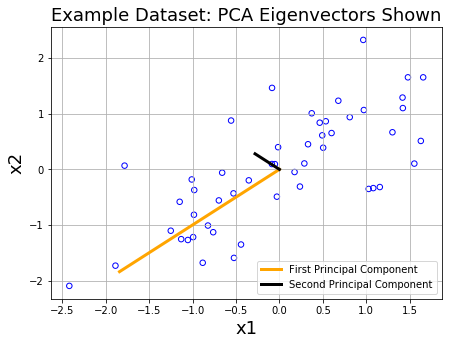

In [134]:
plt.figure(figsize=(7,5))
plot = plt.scatter(X_norm[:,0], X_norm[:,1], s=30, facecolors='none', edgecolors='b')
plt.title("Example Dataset: PCA Eigenvectors Shown",fontsize=18)
plt.xlabel('x1',fontsize=18)
plt.ylabel('x2',fontsize=18)
plt.grid(True)
#To draw the principal component, you draw them starting
#at the mean of the data
plt.plot([mean[0], mean[0] + 1.5*S[0]*U[0,0]], 
         [mean[1], mean[1] + 1.5*S[0]*U[0,1]],
        color='orange',linewidth=3,
        label='First Principal Component')
plt.plot([mean[0], mean[0] + 1.5*S[1]*U[1,0]], 
         [mean[1], mean[1] + 1.5*S[1]*U[1,1]],
        color='k',linewidth=3,
        label='Second Principal Component')
leg = plt.legend(loc=4)